In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load Data 
train= pd.read_csv("C:\\Users\\Shree\\Github\\Bank Loan Status\\Dataset\\train_ctrUa4K (1).csv")
test= pd.read_csv("C:\\Users\\Shree\\Github\\Bank Loan Status\\Dataset\\test_lAUu6dG (1).csv")
sns.set_theme(style="darkgrid")

In [3]:
#First 5 rows of Dataset
print("First 5 rows:\n", train.head())

First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

In [4]:
#Dataset summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Initial Exploration
print("Train Data shape:", train.shape)
print("Train Data columns:", train.columns)

Train Data shape: (614, 13)
Train Data columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
# to understand statistical variation
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


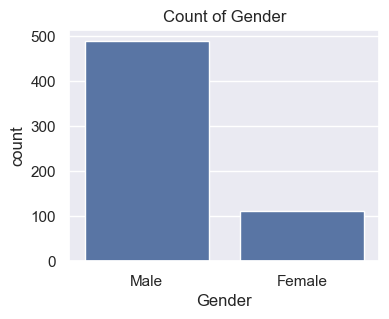

In [7]:
# Univariate EDA - Gender
plt.figure(figsize=(4,3))
sns.countplot(x="Gender", data=train)
plt.title("Count of Gender")
plt.savefig("Count of Gender.png")
plt.show()

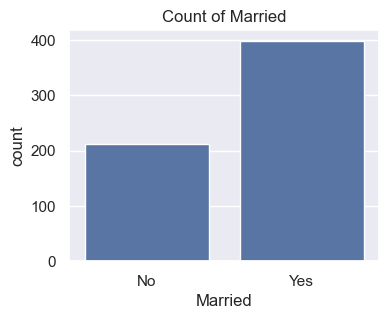

In [8]:
# Univariate EDA - Married
plt.figure(figsize=(4,3))
sns.countplot(x="Married", data=train)
plt.title("Count of Married")
plt.savefig("Count of Married.png")
plt.show()

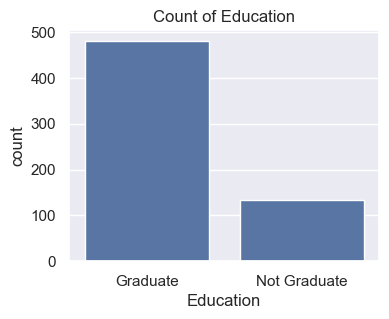

In [9]:
# Univariate EDA - Education
plt.figure(figsize=(4,3))
sns.countplot(x="Education", data=train)
plt.title("Count of Education")
plt.savefig("Count of Education.png")
plt.show()

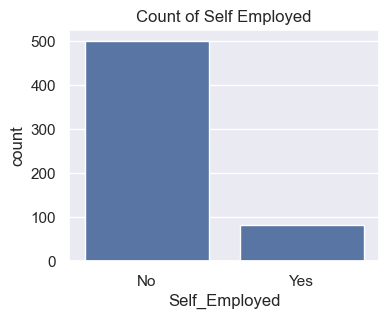

In [10]:
# Univariate EDA - Self_Employed
plt.figure(figsize=(4,3))
sns.countplot(x="Self_Employed", data=train)
plt.title("Count of Self Employed")
plt.savefig("Count of Self Employed.png")
plt.show()

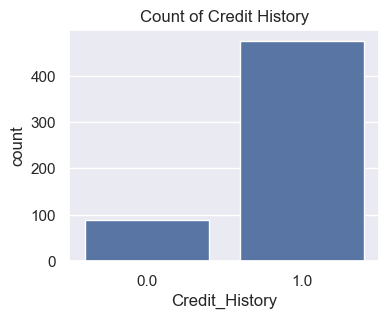

In [11]:
# Univariate EDA - Credit_History
plt.figure(figsize=(4,3))
sns.countplot(x="Credit_History", data=train)
plt.title("Count of Credit History")
plt.savefig("Count of Credit History.png")
plt.show()

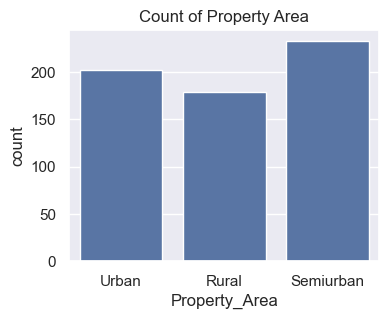

In [12]:
# Univariate EDA - Property_Area
plt.figure(figsize=(4,3))
sns.countplot(x="Property_Area", data=train)
plt.title("Count of Property Area")
plt.savefig("Count of Property.png")
plt.show()

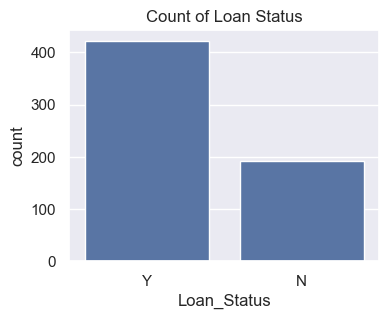

In [13]:
# Univariate EDA - Loan_Status
plt.figure(figsize=(4,3))
sns.countplot(x="Loan_Status", data=train)
plt.title("Count of Loan Status")
plt.savefig("Count of Loan Status.png")
plt.show()

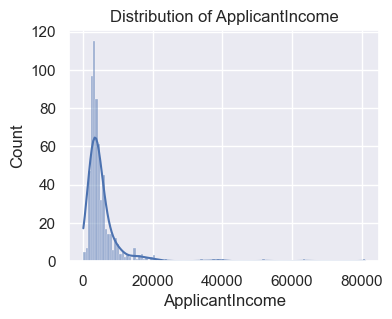

In [14]:
# Univariate EDA - ApplicantIncome
plt.figure(figsize=(4,3))
sns.histplot(train['ApplicantIncome'], kde=True)
plt.title("Distribution of ApplicantIncome")
plt.savefig("Distribution of ApplicantIncome.png")
plt.show()

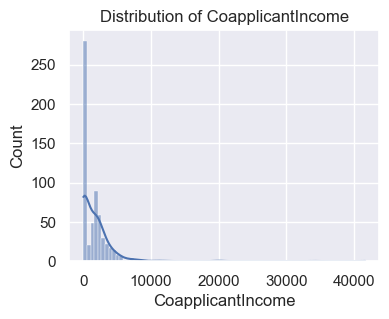

In [15]:
# Univariate EDA - CoapplicantIncome
plt.figure(figsize=(4,3))
sns.histplot(train['CoapplicantIncome'], kde=True)
plt.title("Distribution of CoapplicantIncome")
plt.savefig("Distribution of CoapplicantIncome.png")
plt.show()

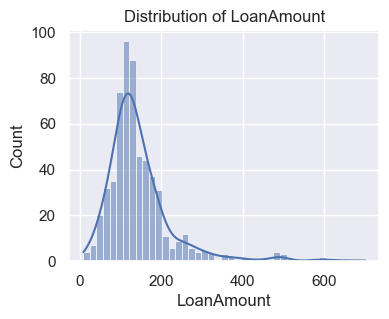

In [16]:
# Univariate EDA - LoanAmount
plt.figure(figsize=(4,3))
sns.histplot(train['LoanAmount'], kde=True)
plt.title("Distribution of LoanAmount")
plt.savefig("Distribution of LoanAmount.png")
plt.show()

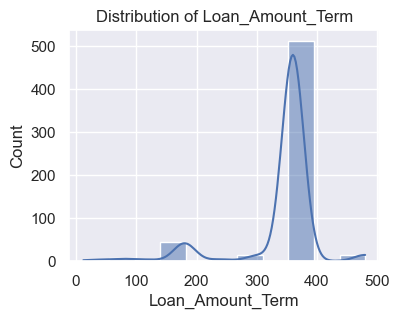

In [17]:
# Univariate EDA - Loan_Amount_Term
plt.figure(figsize=(4,3))
sns.histplot(train['Loan_Amount_Term'], kde=True)
plt.title("Distribution of Loan_Amount_Term")
plt.savefig("Distribution of LoanAmount_Term.png")
plt.show()

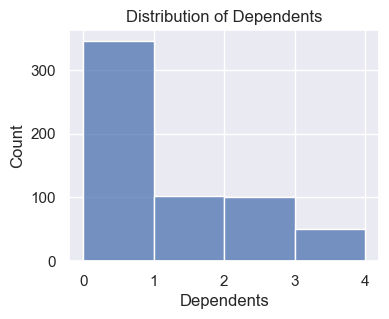

In [18]:
# Univariate EDA - Dependents
train['Dependents'] = train['Dependents'].replace('3+', 3).astype(float)
plt.figure(figsize=(4,3))
sns.histplot(train['Dependents'], bins=[0,1,2,3,4], kde=False)
plt.title("Distribution of Dependents")
plt.savefig("Distribution of Dependents.png")
plt.show()

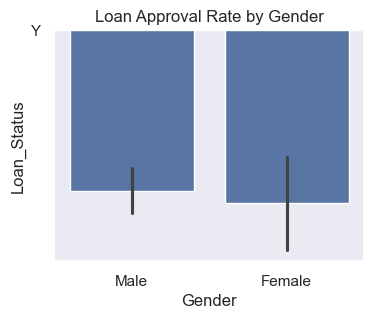

In [19]:
# Bivariate EDA - Loan_Status by Gender
plt.figure(figsize=(4,3))
sns.barplot(x="Gender", y="Loan_Status", data=train)
plt.title("Loan Approval Rate by Gender")
plt.savefig("Loan Approval Rate by Gender.png")
plt.show()

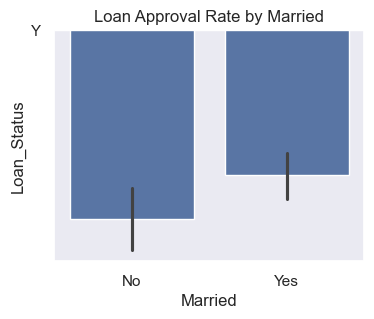

In [20]:
# Bivariate EDA - Loan_Status by Married
plt.figure(figsize=(4,3))
sns.barplot(x="Married", y="Loan_Status", data=train)
plt.title("Loan Approval Rate by Married")
plt.savefig("Loan Approval Rate by Married.png")
plt.show()

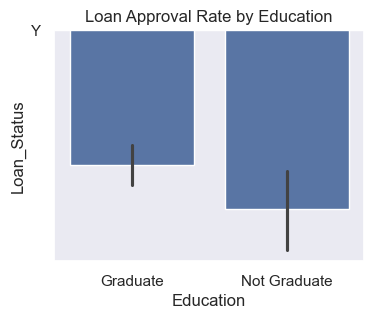

In [21]:
# Bivariate EDA - Loan_Status by Education
plt.figure(figsize=(4,3))
sns.barplot(x="Education", y="Loan_Status", data=train)
plt.title("Loan Approval Rate by Education")
plt.savefig("Loan Approval Rate by Education.png")
plt.show()

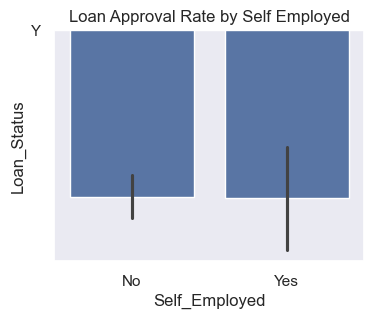

In [22]:
# Bivariate EDA - Loan_Status by Self_Employed
plt.figure(figsize=(4,3))
sns.barplot(x="Self_Employed", y="Loan_Status", data=train)
plt.title("Loan Approval Rate by Self Employed")
plt.savefig("Loan Approval Rate by Self Employed.png")
plt.show()

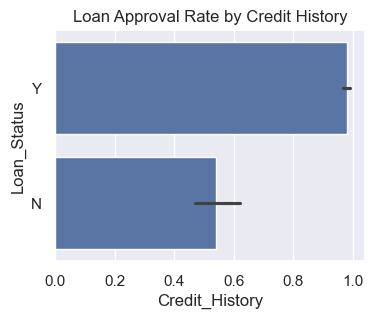

In [23]:
# Bivariate EDA - Loan_Status by Credit_History
plt.figure(figsize=(4,3))
sns.barplot(x="Credit_History", y="Loan_Status", data=train)
plt.title("Loan Approval Rate by Credit History")
plt.savefig("Loan Approval Rate by Credit History.png")
plt.show()

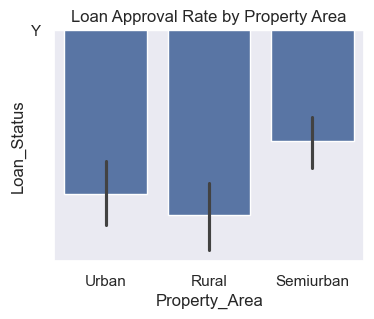

In [24]:
# Bivariate EDA - Loan_Status by Property_Area
plt.figure(figsize=(4,3))
sns.barplot(x="Property_Area", y="Loan_Status", data=train)
plt.title("Loan Approval Rate by Property Area")
plt.savefig("Loan Approval Rate by Property Area.png")
plt.show()

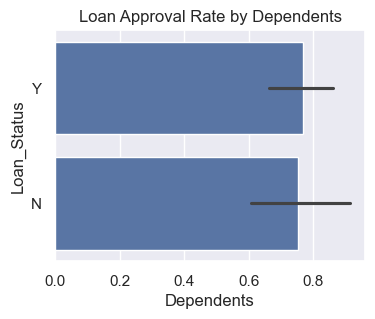

In [25]:
# Bivariate EDA - Loan_Status by Dependents
plt.figure(figsize=(4,3))
sns.barplot(x="Dependents", y="Loan_Status", data=train)
plt.title("Loan Approval Rate by Dependents")
plt.savefig("Loan Approval Rate by Dependents.png")
plt.show()

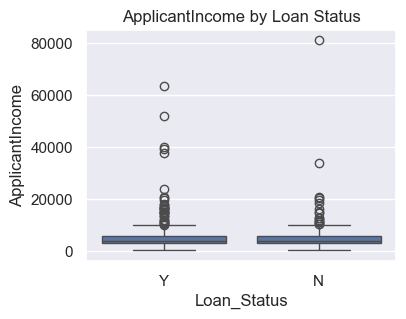

In [26]:
# Bivariate EDA - Boxplot: ApplicantIncome vs. Loan_Status
plt.figure(figsize=(4,3))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=train)
plt.title("ApplicantIncome by Loan Status")
plt.savefig("ApplicantIncome by Loan Status.png")
plt.show()

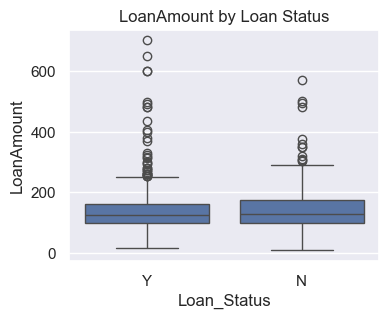

In [27]:
# Bivariate EDA - Boxplot: LoanAmount vs. Loan_Status
plt.figure(figsize=(4,3))
sns.boxplot(x="Loan_Status", y="LoanAmount", data=train)
plt.title("LoanAmount by Loan Status")
plt.savefig("LoanAmount by Loan Status.png")
plt.show()

In [28]:
print("Missing values:\n", train.isnull().sum())

Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [29]:
print("Missing values:\n", test.isnull().sum())

Missing values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Predicted_Status      0
dtype: int64


In [30]:
# For '3+' in Dependents, replace with 3 (for both train and test)
train['Dependents'] = train['Dependents'].replace('3+', 3)
test['Dependents'] = test['Dependents'].replace('3+', 3)

# Fill categorical columns with the mode (most frequent value)
for col in ['Gender', 'Married', 'Self_Employed', 'Credit_History']:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

# Fill numerical columns with the median
for col in ['LoanAmount', 'Loan_Amount_Term', 'Dependents']:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)

In [31]:
print("Missing values after filling (train):\n", train.isnull().sum())
print("Missing values after filling (test):\n", test.isnull().sum())

Missing values after filling (train):
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values after filling (test):
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Predicted_Status     0
dtype: int64


In [32]:
# Data Preparation: Label Encoding for Categorical Variables
train['Gender'] = train['Gender'].map({'Male':1, 'Female':0})
test['Gender'] = test['Gender'].map({'Male':1, 'Female':0})

train['Married'] = train['Married'].map({'Yes':1, 'No':0})
test['Married'] = test['Married'].map({'Yes':1, 'No':0})

train['Education'] = train['Education'].map({'Graduate':1, 'Not Graduate':0})
test['Education'] = test['Education'].map({'Graduate':1, 'Not Graduate':0})

train['Self_Employed'] = train['Self_Employed'].map({'Yes':1, 'No':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1, 'No':0})

train['Loan_Status'] = train['Loan_Status'].map({'Y':1, 'N':0})

In [33]:
# Data Preparation: One-hot Encode Property_Area
train = pd.get_dummies(train, columns=['Property_Area'])
test = pd.get_dummies(test, columns=['Property_Area'])
for col in train.columns:
    if 'Property_Area' in col and col not in test.columns:
        test[col] = 0
test = test[train.drop('Loan_Status', axis=1).columns]

In [34]:
# Check numerical and categorical columns in X_train
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']
Categorical columns: ['Loan_ID']


In [35]:
#Data Preparation: Split Data for Training and Validation
X = train.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train['Loan_Status']
test_X = test.drop(['Loan_ID'], axis=1)
test_ids = test['Loan_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_X_scaled = scaler.transform(test_X)

In [37]:
# Logistic Regression Model - Training & Evaluation
logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(X_train_scaled, y_train)
pred_val_logreg = logreg_model.predict(X_val_scaled)
proba_val_logreg = logreg_model.predict_proba(X_val_scaled)[:,1]

print("\nLogistic Regression Evaluation Metrics")
print("Accuracy :", accuracy_score(y_val, pred_val_logreg))
print("Precision:", precision_score(y_val, pred_val_logreg))
print("Recall   :", recall_score(y_val, pred_val_logreg))
print("F1 Score :", f1_score(y_val, pred_val_logreg))
print("AUC      :", roc_auc_score(y_val, proba_val_logreg))


Logistic Regression Evaluation Metrics
Accuracy : 0.8536585365853658
Precision: 0.8383838383838383
Recall   : 0.9764705882352941
F1 Score : 0.9021739130434783
AUC      : 0.8489164086687306


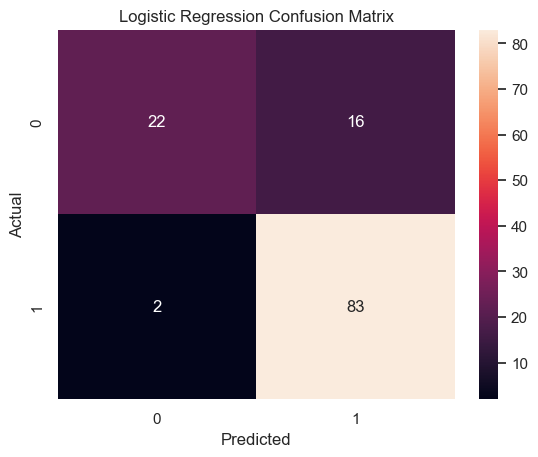

In [38]:
# Logistic Regression: Confusion Matrix & ROC Curve
conf_logreg = confusion_matrix(y_val, pred_val_logreg)
sns.heatmap(conf_logreg, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("Logistic Regression Confusion Matrix.png")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

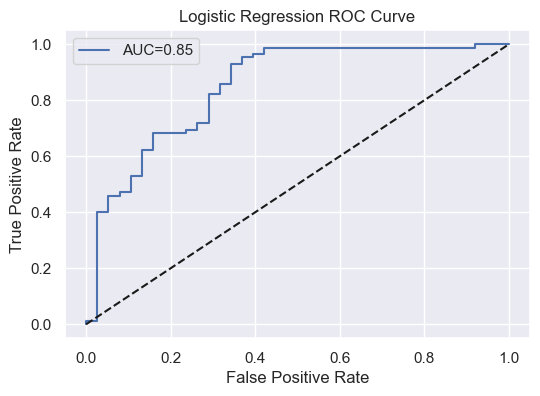

In [39]:
fpr, tpr, _ = roc_curve(y_val, proba_val_logreg)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC={roc_auc_score(y_val, proba_val_logreg):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.savefig("Logistic Regression ROC Curve.png")
plt.legend()
plt.show()

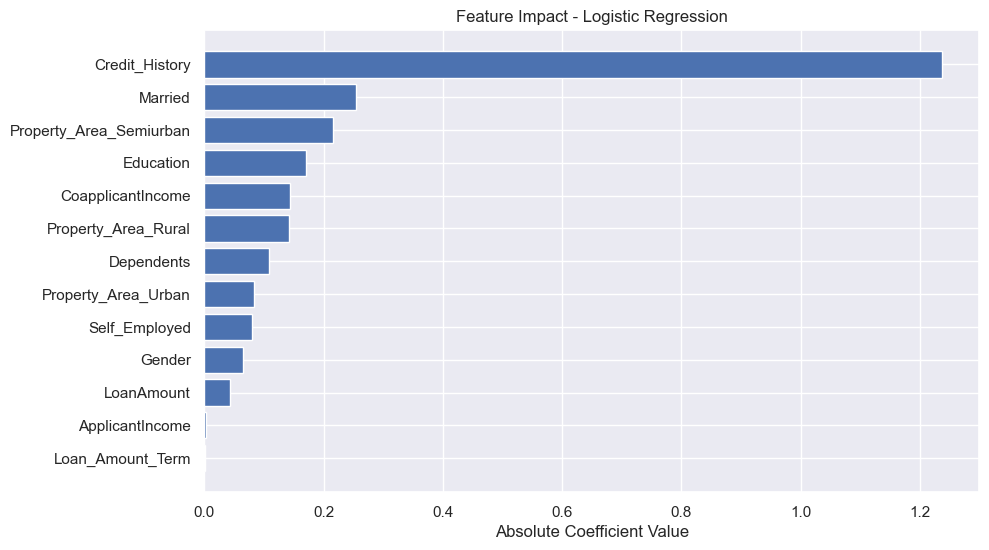

In [45]:
import numpy as np
coefficients = logreg_model.coef_[0]
features = X.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Abs_Coefficient'])
plt.gca().invert_yaxis()
plt.title('Feature Impact - Logistic Regression')
plt.savefig("Feature Impact - Logistic Regression.png")
plt.xlabel('Absolute Coefficient Value')
plt.show()

In [40]:
# Random Forest Model - Training & Evaluation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
pred_val_rf = rf_model.predict(X_val)
proba_val_rf = rf_model.predict_proba(X_val)[:,1]

print("\nRandom Forest Evaluation Metrics")
print("Accuracy :", accuracy_score(y_val, pred_val_rf))
print("Precision:", precision_score(y_val, pred_val_rf))
print("Recall   :", recall_score(y_val, pred_val_rf))
print("F1 Score :", f1_score(y_val, pred_val_rf))
print("AUC      :", roc_auc_score(y_val, proba_val_rf))


Random Forest Evaluation Metrics
Accuracy : 0.8373983739837398
Precision: 0.8494623655913979
Recall   : 0.9294117647058824
F1 Score : 0.8876404494382022
AUC      : 0.8068111455108358


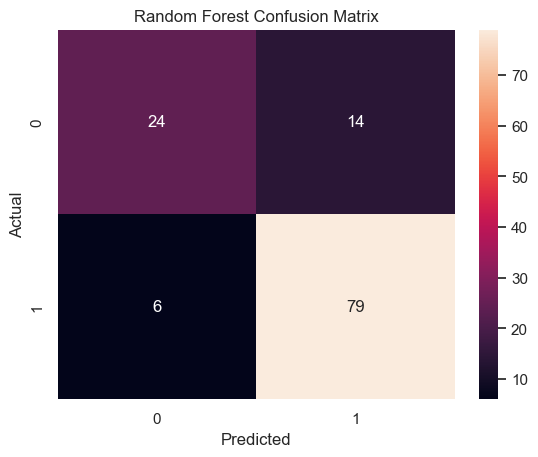

In [41]:
#Random Forest: Confusion Matrix & ROC Curve
conf_rf = confusion_matrix(y_val, pred_val_rf)
sns.heatmap(conf_rf, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.savefig("Random Forest Confusion Matrix.png")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

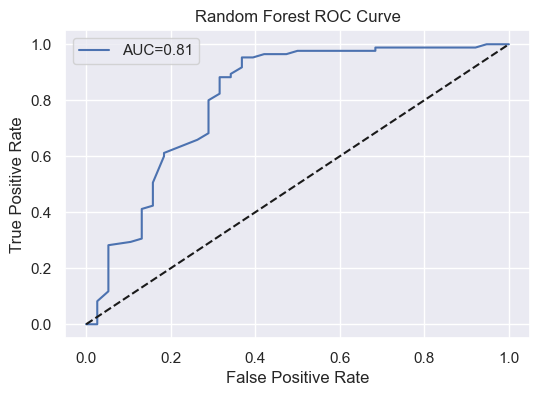

In [42]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, proba_val_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'AUC={roc_auc_score(y_val, proba_val_rf):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.savefig("Random Forest ROC Curve.png")
plt.legend()
plt.show()

In [43]:
# Random Forest: Predict on Test Set

test_preds_rf = rf_model.predict(test_X)
saved_rf = pd.DataFrame({
    'Loan_ID': test_ids,
    'Loan_Status': np.where(test_preds_rf == 1, 'Y', 'N')
})

# Print the first few rows of predictions
print(saved_rf.head())

# Save to CSV file
saved_rf.to_csv('loan_status_predictions_rf.csv', index=False)
print("Random Forest saved as loan_status_predictions_rf.csv")

    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           N
Random Forest saved as loan_status_predictions_rf.csv


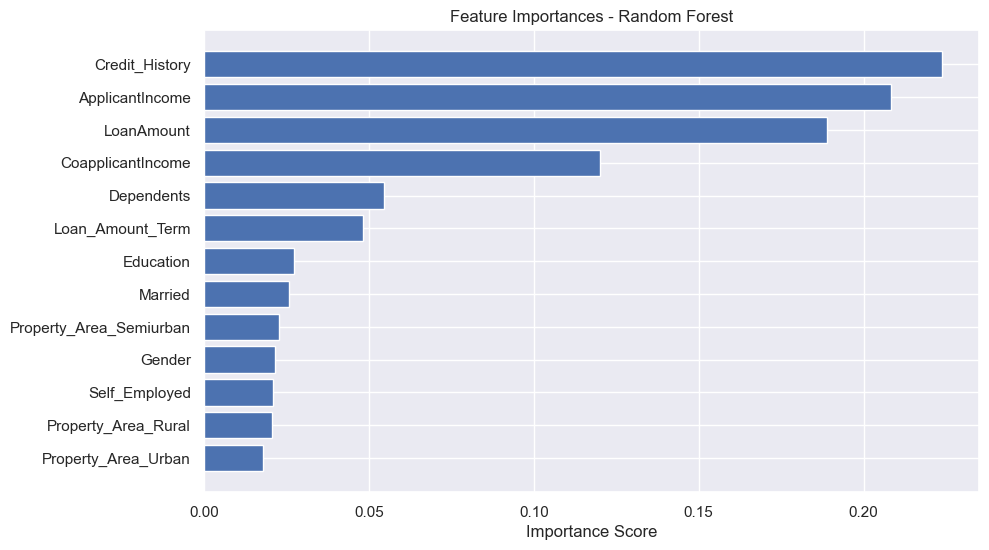

In [46]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances - Random Forest')
plt.savefig("Feature Importances - Random Forest'.png")
plt.xlabel('Importance Score')
plt.show()